In [41]:
import empiricaldist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from thinkstats import decorate

# Frequency Tables
---
*Frequency* is table which contains the values of variables and their frequencies that is how many times they appear in a dataset.

In [2]:
# import FreqTab to compute and plot frequency tables
from empiricaldist import FreqTab

## 1. Create a Frequency Table 

In [3]:
# values
t = [1.0, 2.0, 2.0, 3.0, 5.0]

In [4]:
ftab = FreqTab.from_seq(t)
ftab

,freqs
1.0,1
2.0,2
3.0,1
5.0,1


## 2. Plot the created frequency table

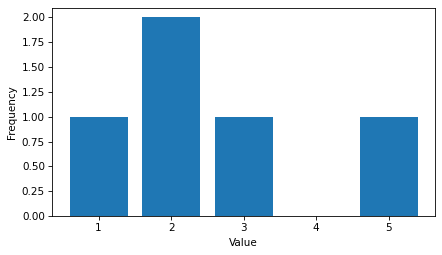

In [5]:
ftab.bar()
decorate(xlabel="Value", ylabel="Frequency")

In [6]:
ftab[2.0], ftab[2]

(np.int64(2), np.int64(2))

## 3. Getting Frequency Quantities
- `qs` attribute of `FreqTab` object returns an array of values.

In [7]:
ftab.qs

array([1., 2., 3., 5.])

- `fs` returns an array of frequencies.

In [8]:
ftab.fs

array([1, 2, 1, 1])

## 4. Getting all values of frequency table

In [9]:
for x, freq in ftab.items():
    print(f"{x} | {freq}")

1.0 | 1
2.0 | 2
3.0 | 1
5.0 | 1


# NSFG Distributions
---

In [10]:
# importing the nsfg data
from nsfg import read_fem_preg
preg = read_fem_preg()

1. Select the rows where the pregnancies ended in live birth that is where the outcome is 1.

In [11]:
live = preg.query("outcome == 1")

2. Count the number of times each quantity appears in `birthwgt_lb`.
here, the `name` argument gives the FreqTab object a name.

In [12]:
ftab_lb = FreqTab.from_seq(live["birthwgt_lb"], name="birthwgt_lb")

3. Plot the frequency.

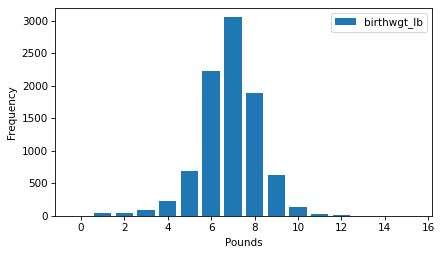

In [13]:
ftab_lb.bar()
decorate(xlabel="Pounds", ylabel="Frequency")

4. Find the mode of the distribution using `idxmax()` method.

In [14]:
ftab_lb.idxmax()

np.float64(7.0)

In [15]:
ftab_lb.mode()

np.float64(7.0)

5. Do the same with `birthwgt_oz`.

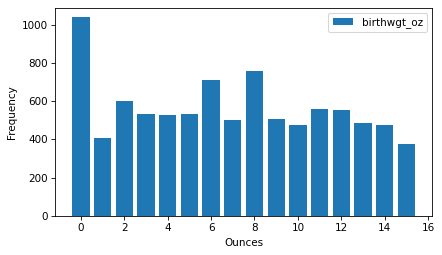

In [16]:
ftab_oz = FreqTab.from_seq(live["birthwgt_oz"], name="birthwgt_oz")
ftab_oz.bar()
decorate(xlabel="Ounces", ylabel="Frequency")

6. Plot the mother's age at the time of birth. 

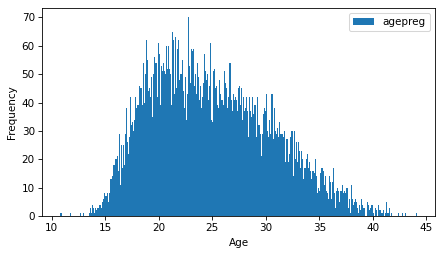

In [17]:
ftab_age = FreqTab.from_seq(live["agepreg"], name="agepreg")
ftab_age.bar(width=0.1)
decorate(xlabel="Age", ylabel="Frequency")

7. Plot the frequcency table of `prglngth`, the `xlim` argument sets the limit of the x-axis to the range from 20 to 50 weeks.

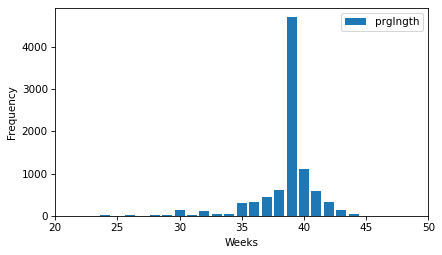

In [18]:
ftab_length = FreqTab.from_seq(live["prglngth"], name="prglngth")
ftab_length.bar()
decorate(xlabel="Weeks", ylabel="Frequency", xlim=[20, 50])

## Outliers
---
Outliers are extreme values that might be measurement or recording errors, or might be accurate reports of rare events.

1. Find the smallest outliers or quantities and their frequencies.

In [19]:
def smallest(ftab, n=10):
    return ftab[:n]

In [20]:
smallest(ftab_length)

prglngth
0     1
4     1
9     1
13    1
17    2
18    1
19    1
20    1
21    2
22    7
Name: prglngth, dtype: int64

2. Find the largest or longest pregnancy lengths.

In [21]:
def largest(ftab, n=10):
    return ftab[-n:]

In [22]:
largest(ftab_length)

prglngth
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

# First Babies
---
Comparing the distribution of pregnancy lengths for babies and others.

In [23]:
# selecting rows that represent first babies and others
firsts = live.query("birthord == 1")
others = live.query("birthord != 1")

In [24]:
ftab_first = FreqTab.from_seq(firsts["prglngth"], name="firsts")
ftab_other = FreqTab.from_seq(others["prglngth"], name="others")

## Plotting the above two frequencies side-by-side

In [25]:
def two_bar_plots(ftab1, ftab2, width=0.45):
    ftab1.bar(align="edge", width=-width)
    ftab2.bar(align="edge", width=width, alpha=0.8)

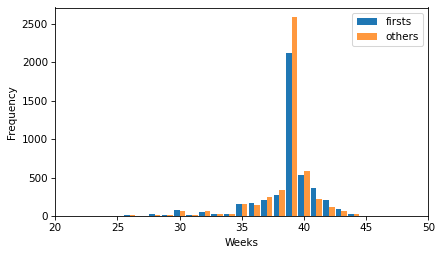

In [26]:
two_bar_plots(ftab_first, ftab_other)
decorate(xlabel="Weeks", ylabel="Frequency", xlim=[20, 50])

In [27]:
firsts["prglngth"].count(), others["prglngth"].count()

(np.int64(4413), np.int64(4735))

- Comparing the means of the distributions, it looks like first babies are a little bit later on average.

In [28]:
first_mean = firsts["prglngth"].mean()
other_mean = others["prglngth"].mean()
first_mean, other_mean

(np.float64(38.60095173351461), np.float64(38.52291446673706))

In [29]:
diff = first_mean - other_mean
diff, diff * 7 * 24

(np.float64(0.07803726677754952), np.float64(13.11026081862832))

- The difference is only 0.078 weeks, which is about **13 hours**.

## Reasons contributing to such difference
- This might be the actual difference in average pregnancy length of first babies and others.
- Bias of sampling process -- Selection of survey respondents.
- Might be an result of measurement error.
- Might be the result of random variation in the sampling process.

# Effect Size
---
A differenct like above is known as "Effect". 

- Reporting the difference in relative terms.

In [30]:
diff / live["prglngth"].mean() * 100

np.float64(0.20237586646738304)

- Reporting a standardized effect size, which quantifies the size of an effect in a way that is comparable between different quantities and different groups.

In [31]:
diff / live["prglngth"].std()

np.float64(0.028877623375210403)

## Computing the pooled standard deviation of two groups
---

- If the two groups are substially different,  the standard deviation when we put them together is larger than in either group, which might make the effect size seem small.

- Using the “wrong” standard deviation can either shrink or distort the effect size. That’s why researchers prefer the pooled standard deviation, which balances both group sizes fairly.

- **Solution :** Using the pooled standard deviation, which is the square root of pooled variance.
- **Pooled variance :** The weighted sum of the variances in two groups. 

**We calculate these things because we want to know how big and meaningful a difference really is, in a way that’s fair, comparable, and not distorted by scale or variability.**

- Calculate the pooled variance.

In [32]:
group1, group2 = firsts["prglngth"], others["prglngth"] 

In [33]:
v1, v2 = group1.var(), group2.var()

In [34]:
# Weighted sum
n1, n2 = group1.count(), group2.count() # group sizes as weights
pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

- Calculate the pooled standard deviation.

In [35]:
np.sqrt(pooled_var)

np.float64(2.7022108144953862)

- The above standard deviation is between the standard deviations of the groups.

In [36]:
firsts["prglngth"].std(), others["prglngth"].std()

(np.float64(2.7919014146687204), np.float64(2.6158523504392375))

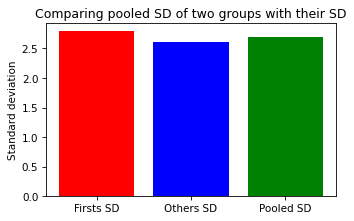

In [49]:
plt.figure(figsize=(5, 3))
bars = ["Firsts SD", "Others SD", "Pooled SD"]
values =  [firsts["prglngth"].std(), others["prglngth"].std(), np.sqrt(pooled_var)]
plt.bar(bars, values, color=["red", "blue", "green"])
plt.title("Comparing pooled SD of two groups with their SD")
plt.ylabel("Standard deviation")
plt.show()

- Calculating *Cohen's effect size*. 

In [52]:
def cohen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean()
    v1, v2 = group1.var(), group2.var()
    n1, n2 = group1.count(), group2.count()
    pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

    return diff / np.sqrt(pooled_var)

In [53]:
cohen_effect_size(firsts["prglngth"], others["prglngth"])

np.float64(0.028879044654449834)

# Exercises
---


In [55]:
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print(f"Dowloaded {local}")
        
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dat.gz")

Dowloaded 2002FemResp.dct
Dowloaded 2002FemResp.dat.gz


In [56]:
from nsfg import read_fem_resp
resp = read_fem_resp()
resp.shape

(7643, 3092)

## Exercise 2.1
---

In [58]:
resp["totincr"].mean()

np.float64(8.816695015046447)

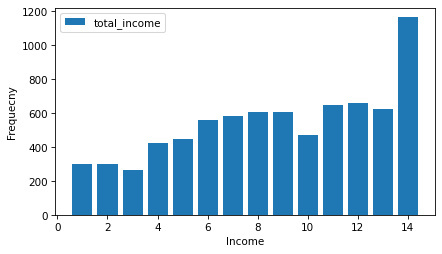

In [60]:
total_income = FreqTab.from_seq(resp["totincr"], name="total_income")
total_income.bar()
decorate(xlabel="Income", ylabel="Frequecny")

## Exercise 2.2
---

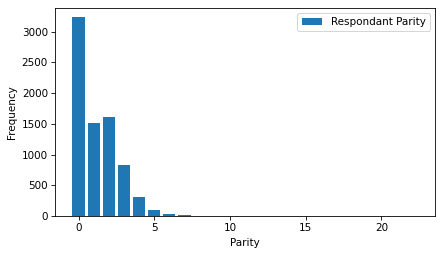

In [61]:
resp_parity = FreqTab.from_seq(resp["parity"], name="Respondant Parity")
resp_parity.bar()
decorate(xlabel="Parity", ylabel="Frequency")

In [62]:
largest(resp_parity)

parity
3     828
4     309
5      95
6      29
7      15
8       8
9       2
10      3
16      1
22      1
Name: Respondant Parity, dtype: int64

- The shape of distribution is left skewed.
- The values of 10, 16, 22 are certainly errors as there are, probably, no respondants with 10, 16 & 22 childrens.

## Exercise 2.3
---

In [71]:
highest_income = resp.query("totincr == 14")
other_resp = resp.query("totincr != 14")

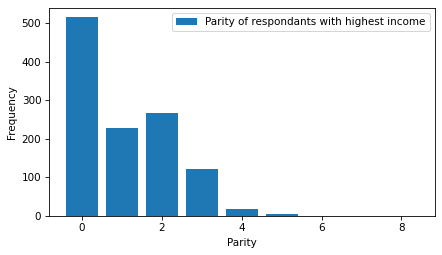

In [72]:
parity_high = FreqTab.from_seq(highest_income["parity"], name="Parity of respondants with highest income")
parity_high.bar()
decorate(xlabel="Parity", ylabel="Frequency")

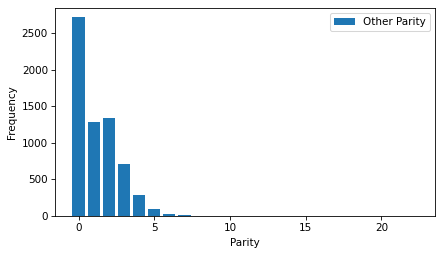

In [75]:
parity_others = FreqTab.from_seq(other_resp["parity"], name="Other Parity")
parity_others.bar()
decorate(xlabel="Parity", ylabel="Frequency")

In [78]:
highest_income["parity"].mean(), other_resp["parity"].mean()

(np.float64(1.0758620689655172), np.float64(1.2495758136665125))

In [81]:
diff_mean = other_resp["parity"].mean() - highest_income["parity"].mean()
diff_mean

np.float64(0.17371374470099532)

In [82]:
cohen_effec_size(other_resp["parity"], highest_income["parity"])

np.float64(0.12511855314660367)